# Comprehensive Analysis of the Big Five Canadian Banks' Stock Performance

Description:
This script performs a comprehensive analysis of the historical stock performance 
(2000-2025) of Canada's five largest banks. It includes data collection from the 
yfinance API, exploratory data analysis, volatility and risk-adjusted return 
calculations.

Authors:  
* Nadia Ríos
* Lhagii Tsogtbayar

Project for:
Data Analytics Case Study 3 (University of Niagara Falls Canada)  
Date: September 2025

### 0. Download the datasets for the Big five Canadian Banks

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.ticker as mtick 
import statsmodels.api as sm

In [3]:
# Define the stock tickers for the Big Five Canadian banks on the Toronto Stock Exchange (TSX)
rbc = "RY.TO" # Royal Bank of Canada
td = "TD.TO" # Toronto-Dominion Bank
bmo = "BMO.TO" # Bank of Montreal
scotia = "BNS.TO" # Scotiabank (Bank of Nova Scotia)
cibc = "CM.TO" # Canadian Imperial Bank of Commerce

# Define the start and end dates
start_date = "2000-01-01"
end_date = "2025-08-30"

rbc_data = yf.download(rbc, start=start_date, end=end_date,auto_adjust=False , multi_level_index=False)
td_data = yf.download(td, start=start_date, end=end_date, auto_adjust=False, multi_level_index=False)
bmo_data = yf.download(bmo, start=start_date, end=end_date, auto_adjust=False, multi_level_index=False)
scotia_data = yf.download(scotia, start=start_date, end=end_date, auto_adjust=False, multi_level_index=False)
cibc_data = yf.download(cibc, start=start_date, end=end_date, auto_adjust=False, multi_level_index=False)
                     
print("Royal Bank of Canada Stock Data:\n" , rbc_data.head())
print("\nToronto-Dominion Bank Stock Data:\n", td_data.head())
print("\nBank of Montreal Stock Data:\n", bmo_data.head())
print("\nScotiabank (Bank of Nova Scotia) Stock Data:\n", scotia_data.head())
print("\nCanadian Imperial Bank of Commerce Stock Data:\n", cibc_data.head())

# Save the data to a CSV file
#rbc_data.to_csv("RBC_data.csv")
#td_data.to_csv("TD_data.csv")
#bmo_data.to_csv("BMO_data.csv")
#scotia_data.to_csv("Scotia_data.csv")
#cibc_data.to_csv("CIBC_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Royal Bank of Canada Stock Data:
             Adj Close    Close   High      Low    Open   Volume
Date                                                           
2000-01-04   6.024871  15.4375  15.75  15.2750  15.750  3963200
2000-01-05   6.000481  15.3750  15.55  15.3500  15.475  4668800
2000-01-06   6.088294  15.6000  15.75  15.2000  15.250  2284400
2000-01-07   6.029753  15.4500  15.60  15.2250  15.600  3456000
2000-01-10   5.941942  15.2250  15.50  15.0875  15.300  2426400

Toronto-Dominion Bank Stock Data:
             Adj Close   Close       High        Low       Open   Volume
Date                                                                   
2000-01-04   7.485776  19.000  19.000000  18.250000  18.750000  3786200
2000-01-05   7.229688  18.350  18.750000  18.299999  18.700001  6742200
2000-01-06   7.091787  18.000  18.350000  17.750000  18.250000  3729600
2000-01-07   7.003140  17.775  18.049999  17.375000  18.049999  4133600
2000-01-10   6.894795  17.500  17.975000  17.45000

#### Merging the critical column 'Adj Close' for following analytical steps

In [5]:
# Extract the "Adj Close" columns and rename them to the ticker symbols
rbc_adj = rbc_data[['Adj Close']].rename(columns={'Adj Close': 'RY.TO'})
td_adj = td_data[['Adj Close']].rename(columns={'Adj Close': 'TD.TO'})
bmo_adj = bmo_data[['Adj Close']].rename(columns={'Adj Close': 'BMO.TO'})
scotia_adj = scotia_data[['Adj Close']].rename(columns={'Adj Close': 'BNS.TO'})
cibc_adj = cibc_data[['Adj Close']].rename(columns={'Adj Close': 'CM.TO'})

# Merge them all into one DataFrame using the Date as the index
bank_data = pd.concat([bmo_adj, scotia_adj, cibc_adj, rbc_adj, td_adj], axis=1)

# Reset the index so that Date becomes a column
bank_data = bank_data.reset_index()

# Display the result
print(bank_data.head())

# Save to CSV if needed
#bank_data.to_csv("bank_data_adj_close.csv", index=False)

        Date    BMO.TO    BNS.TO     CM.TO     RY.TO     TD.TO
0 2000-01-04  8.133959  5.394942  5.384401  6.024871  7.485776
1 2000-01-05  8.022418  5.412289  5.424702  6.000481  7.229688
2 2000-01-06  8.133959  5.394942  5.432767  6.088294  7.091787
3 2000-01-07  8.048158  5.377591  5.432767  6.029753  7.003140
4 2000-01-10  7.859399  5.204123  5.319917  5.941942  6.894795


In [6]:
bank_data.set_index('Date', inplace=True)
bank_data.index = pd.to_datetime(bank_data.index)
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6446 entries, 2000-01-04 to 2025-08-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMO.TO  6446 non-null   float64
 1   BNS.TO  6446 non-null   float64
 2   CM.TO   6446 non-null   float64
 3   RY.TO   6446 non-null   float64
 4   TD.TO   6446 non-null   float64
dtypes: float64(5)
memory usage: 302.2 KB


In [7]:
# Calculate daily returns
adj_close_prices = bank_data
daily_returns = adj_close_prices.pct_change().dropna()

# drop the year column
daily_returns = daily_returns.drop(columns=['Year'], errors='ignore')

print(daily_returns)
# Save daily returns to a CSV file
daily_returns.to_csv("daily_returns.csv")

              BMO.TO    BNS.TO     CM.TO     RY.TO     TD.TO
Date                                                        
2000-01-05 -0.013713  0.003215  0.007485 -0.004048 -0.034210
2000-01-06  0.013904 -0.003205  0.001487  0.014634 -0.019074
2000-01-07 -0.010549 -0.003216  0.000000 -0.009615 -0.012500
2000-01-10 -0.023454 -0.032258 -0.020772 -0.014563 -0.015471
2000-01-11 -0.013101 -0.023333 -0.010606 -0.018884 -0.030000
...              ...       ...       ...       ...       ...
2025-08-25 -0.005672 -0.002133 -0.005335 -0.009284 -0.005832
2025-08-26  0.046774  0.068528  0.013806  0.007994  0.017696
2025-08-27 -0.005691  0.001765  0.017047  0.050843  0.008839
2025-08-28 -0.001157  0.008105  0.020229  0.003499 -0.045139
2025-08-29  0.013168 -0.000583  0.001699 -0.005927  0.028423

[6445 rows x 5 columns]


In [8]:
print("\nDescriptive Statistics of Daily Returns (2000-2025)")
daily_returns.describe()


Descriptive Statistics of Daily Returns (2000-2025)


,BMO.TO,BNS.TO,CM.TO,RY.TO,TD.TO
count,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000
mean,0.000567,0.000524,0.000569,0.000633,0.000503
std,0.014064,0.013744,0.014593,0.013441,0.013840
min,-0.164134,-0.133721,-0.171335,-0.134499,-0.127378
25%,-0.005246,-0.005295,-0.005254,-0.005144,-0.005324
50%,0.000696,0.000764,0.000697,0.000779,0.000798
75%,0.006432,0.006650,0.006513,0.006402,0.006542
max,0.169752,0.168377,0.189577,0.148963,0.178819


### Exploratory Data Analysis (EDA)

##### 3.1	Industry-Wide Trends & Correlations: RQ2

3.1.1 Correlation analysis

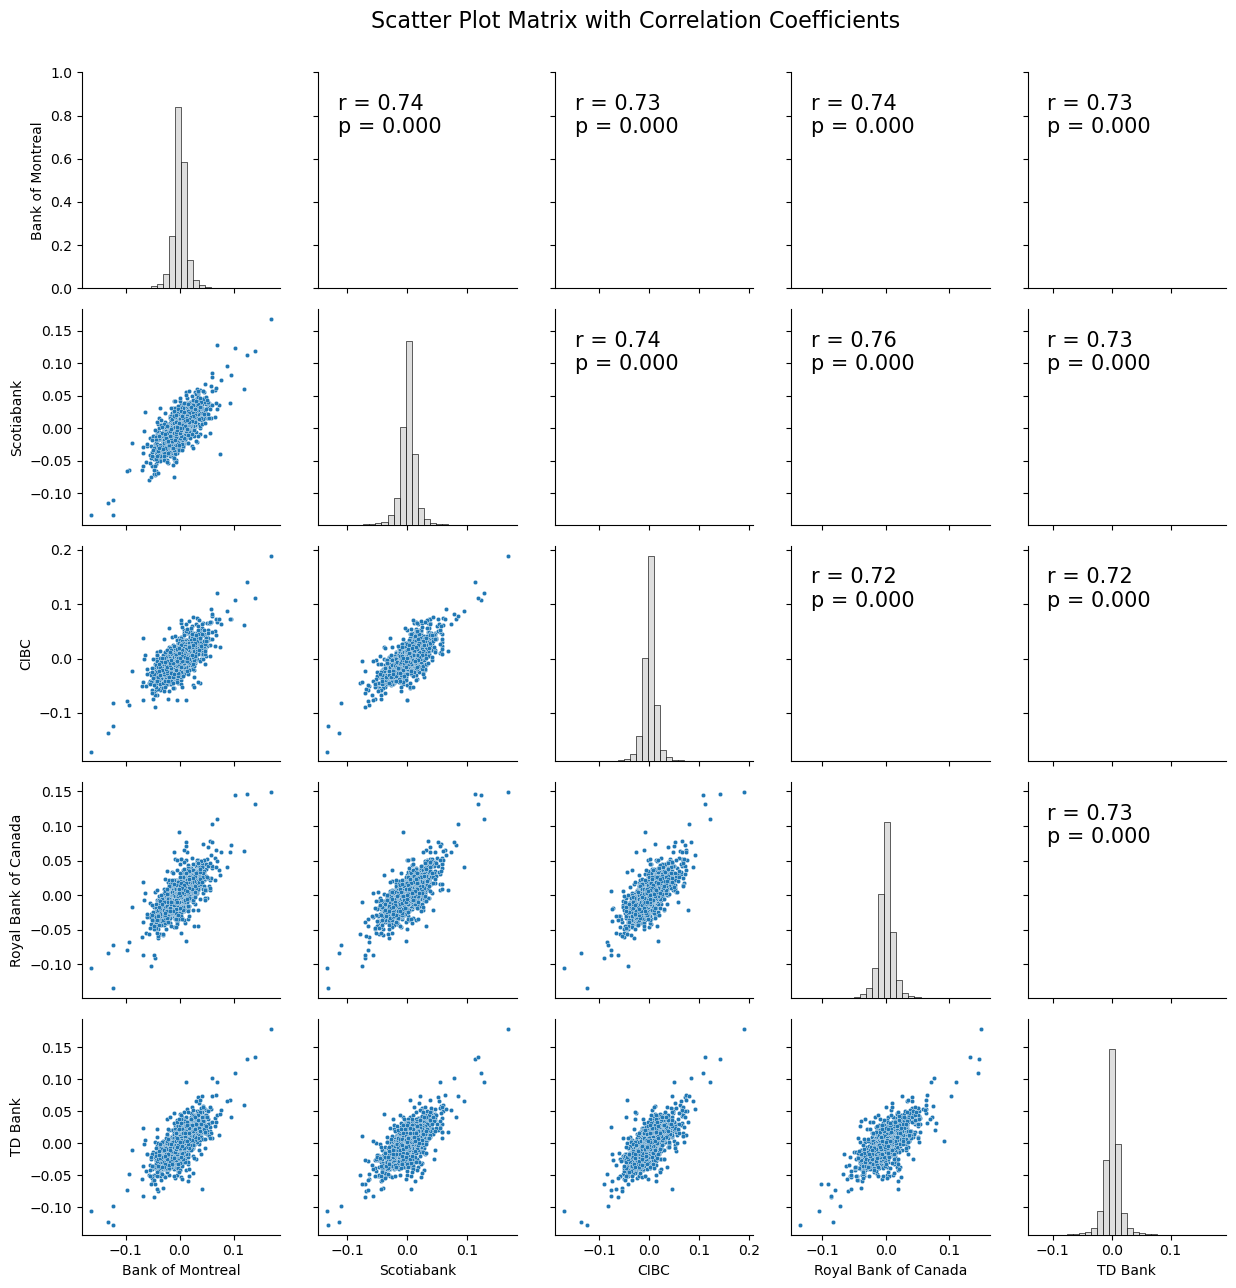

In [9]:
# STEP 0: Create the mapping from ticker to bank name
ticker_to_name = {
    'BMO.TO': 'Bank of Montreal',
    'BNS.TO': 'Scotiabank',
    'CM.TO': 'CIBC',
    'RY.TO': 'Royal Bank of Canada',
    'TD.TO': 'TD Bank'
}

# STEP 1: Copy the data and rename columns
plot_df = daily_returns.copy()
plot_df.rename(columns=ticker_to_name, inplace=True)

# STEP 2: Define the custom annotation function
def corrfunc(x, y, **kws):
    r, p = pearsonr(x, y)
    label = f'r = {r:.2f}\np = {p:.3f}'
    ax = plt.gca()
    ax.annotate(label, xy=(0.1, 0.9), xycoords=ax.transAxes, fontsize=15, ha='left', va='top')

# STEP 3: Create the pairplot
g = sns.PairGrid(plot_df)

g.map_diag(sns.histplot, bins=30, kde=False, color='lightgray')
g.map_lower(sns.scatterplot, s=10)
g.map_upper(corrfunc)

# STEP 4: Add title
g.fig.suptitle("Scatter Plot Matrix with Correlation Coefficients", y=1.03, fontsize=16)

# STEP 5: Show plot
plt.show()

3.1.2 Which bank is the best bellwether?

In [11]:
# Assume 'daily_returns' is your DataFrame with the daily returns for all 5 banks.
# Example columns: ['BMO.TO', 'BNS.TO', 'CM.TO', 'RY.TO', 'TD.TO']

# 1. Calculate the full correlation matrix
correlation_matrix = daily_returns.corr()

print("--- Correlation Matrix ---")
print(correlation_matrix)

# 2. Calculate the average correlation for each bank
# We sum each column and subtract 1 (to remove the self-correlation of 1.0),
# then divide by the number of other banks (4).
average_correlations = (correlation_matrix.sum() - 1) / (len(correlation_matrix.columns) - 1)
average_correlations = average_correlations.sort_values(ascending=False)

print("\n--- Average Correlation with Peers ---")
print(average_correlations)

# 3. Identify the bellwether
bellwether_bank = average_correlations.index[0]
bellwether_value = average_correlations.iloc[0]

print(f"\nConclusion: The best bellwether for the sector is {bellwether_bank},")
print(f"with the highest average correlation of {bellwether_value:.4f} to its peers.")

--- Correlation Matrix ---
          BMO.TO    BNS.TO     CM.TO     RY.TO     TD.TO
BMO.TO  1.000000  0.738764  0.731231  0.738527  0.725567
BNS.TO  0.738764  1.000000  0.743389  0.756673  0.728799
CM.TO   0.731231  0.743389  1.000000  0.721333  0.715370
RY.TO   0.738527  0.756673  0.721333  1.000000  0.734580
TD.TO   0.725567  0.728799  0.715370  0.734580  1.000000

--- Average Correlation with Peers ---
BNS.TO    0.741906
RY.TO     0.737778
BMO.TO    0.733522
CM.TO     0.727831
TD.TO     0.726079
dtype: float64

Conclusion: The best bellwether for the sector is BNS.TO,
with the highest average correlation of 0.7419 to its peers.


### Table: Average Correlation of Canadian Banks with Market Index

| Bank                  | Ticker | Average Correlation (r) |
|-----------------------|--------|--------------------------|
| Scotiabank            | BNS.TO | 0.7419                  |
| Royal Bank of Canada  | RY.TO  | 0.7378                  |
| Bank of Montreal      | BMO.TO | 0.7335                  |
| CIBC                  | CM.TO  | 0.7278                  |
| TD Bank               | TD.TO  | 0.7261                  |


### 3.2	 Volatility and Average Returns: RQ1 

Summary Statistics
        Mean_Return  Volatility
BMO.TO     0.000567    0.014064
BNS.TO     0.000524    0.013744
CM.TO      0.000569    0.014593
RY.TO      0.000633    0.013441
TD.TO      0.000503    0.013840

Most volatile bank: CM.TO

Correlation between volatility and return: -0.1961

 Regression Results
                            OLS Regression Results                            
Dep. Variable:            Mean_Return   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.282
Method:                 Least Squares   F-statistic:                    0.1200
Date:                Sun, 31 Aug 2025   Prob (F-statistic):              0.752
Time:                        16:28:59   Log-Likelihood:                 43.053
No. Observations:                   5   AIC:                            -82.11
Df Residuals:                       3   BIC:                            -82.89
Df Model:                           1                    

c:\Users\Batmurun Erdenebat\Python\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


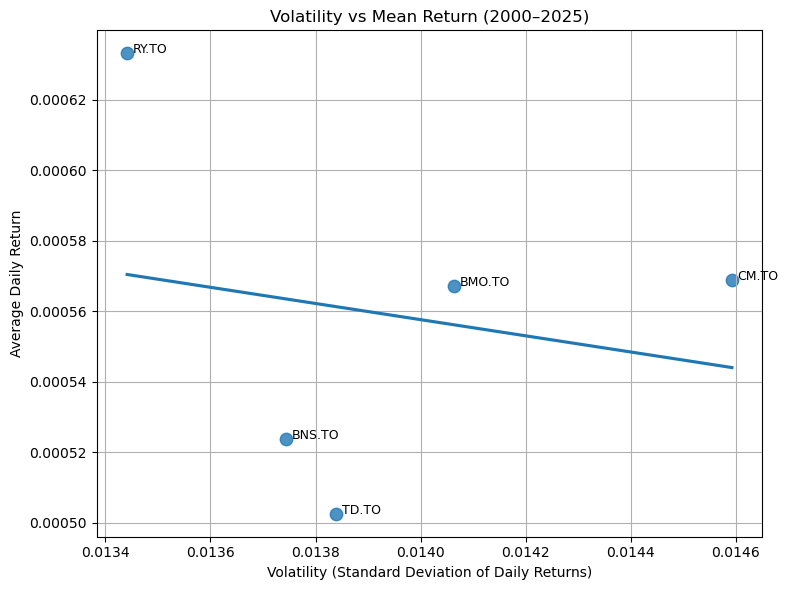

In [12]:
# 1. Summary Statistics
summary_stats = daily_returns.agg(['mean', 'std']).T
summary_stats.columns = ['Mean_Return', 'Volatility']
print("Summary Statistics")
print(summary_stats)
# The most volatile bank
most_volatile_bank = summary_stats['Volatility'].idxmax()
print(f"\nMost volatile bank: {most_volatile_bank}")

# 2. Correlation and Regression
# Correlation between volatility and return
correlation = summary_stats['Mean_Return'].corr(summary_stats['Volatility'])
print(f"\nCorrelation between volatility and return: {correlation:.4f}")
# Linear regression
X = summary_stats['Volatility']
y = summary_stats['Mean_Return']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\n Regression Results")
print(model.summary())

# 3. Scatter Plot
plt.figure(figsize=(8, 6))
sns.regplot(x='Volatility', y='Mean_Return', data=summary_stats, ci=None, scatter_kws={"s": 80})
for bank, row in summary_stats.iterrows():
    plt.text(row['Volatility'] + 0.00001, row['Mean_Return'], bank, fontsize=9)
plt.title('Volatility vs Mean Return (2000–2025)')
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('Average Daily Return')
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.3	Risk-Adjusted Performance and Predictive Strategy Justification: RQ3

In [14]:
print("\nKey Metrics for Volatility vs. Return")
# Mean daily return (convert to percentage for easier reading)
avg_daily_return = daily_returns.mean() * 100
print("\nAverage Daily Return (%):")
print(avg_daily_return)

# Standard deviation of daily returns (our measure of volatility/risk)
daily_volatility = daily_returns.std()
print("\nVolatility (Standard Deviation of Daily Returns):")
print(daily_volatility)

# Optional but highly recommended: Calculate Risk-Adjusted Return (Sharpe Ratio)
# For simplicity, we'll assume a risk-free rate of 0
daily_sharpe_ratio = daily_returns.mean() / daily_returns.std()

#Annualize the Sharpe Ratio: multiply by the square root of 252 (the number of trading days in a year)
annualized_sharpe_ratio = daily_sharpe_ratio * np.sqrt(252)

#Combine into a new DataFrame for a clean presentation
sharpe_ratios_df = pd.DataFrame({
    'Daily Sharpe Ratio': daily_sharpe_ratio,
    'Annualized Sharpe Ratio': annualized_sharpe_ratio
})

# Sort by the Annualized Sharpe Ratio to easily see the winner
sharpe_ratios_df = sharpe_ratios_df.sort_values(by='Annualized Sharpe Ratio', ascending=False)

print("\nDaily & Annualized Sharpe Ratios (2000-2025)")
print(sharpe_ratios_df)


Key Metrics for Volatility vs. Return

Average Daily Return (%):
BMO.TO    0.056718
BNS.TO    0.052368
CM.TO     0.056889
RY.TO     0.063321
TD.TO     0.050258
dtype: float64

Volatility (Standard Deviation of Daily Returns):
BMO.TO    0.014064
BNS.TO    0.013744
CM.TO     0.014593
RY.TO     0.013441
TD.TO     0.013840
dtype: float64

Daily & Annualized Sharpe Ratios (2000-2025)
        Daily Sharpe Ratio  Annualized Sharpe Ratio
RY.TO             0.047110                 0.747840
BMO.TO            0.040328                 0.640192
CM.TO             0.038985                 0.618871
BNS.TO            0.038103                 0.604868
TD.TO             0.036315                 0.576483


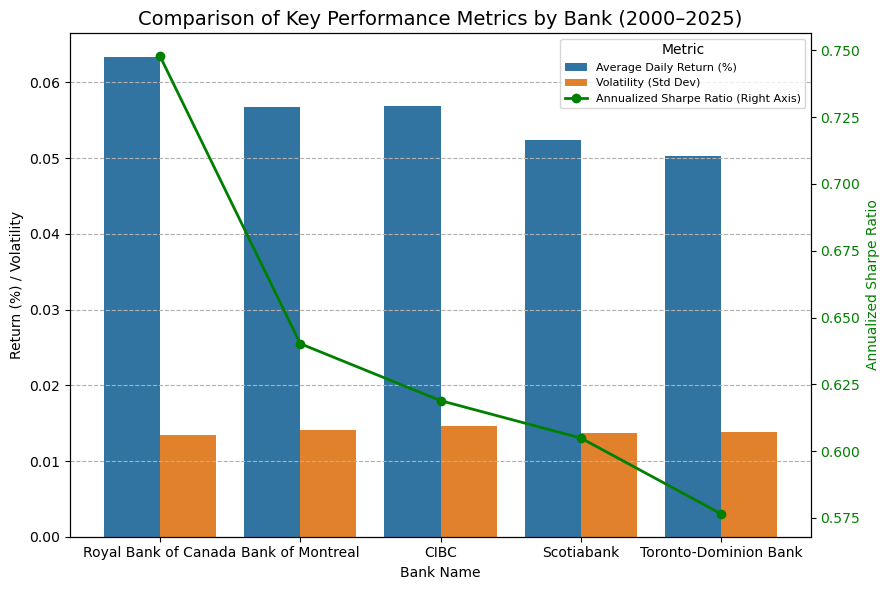

In [15]:
# Step 1: Create a summary DataFrame
ticker_to_name = {
    'RY.TO': 'Royal Bank of Canada',
    'TD.TO': 'Toronto-Dominion Bank',
    'BNS.TO': 'Scotiabank',
    'BMO.TO': 'Bank of Montreal',
    'CM.TO': 'CIBC'
}

summary_df = pd.DataFrame({
    'Average Daily Return (%)': daily_returns.mean() * 100,
    'Volatility (Std Dev)': daily_returns.std(),
    'Annualized Sharpe Ratio': annualized_sharpe_ratio
})

# Add bank names using the corrected dictionary
summary_df['Bank Name'] = summary_df.index.map(ticker_to_name)


# --- STEP 2: SORT BY SHARPE RATIO AND PREPARE FOR PLOTTING ---
# Sort the DataFrame. This will be our definitive order for plotting.
summary_df = summary_df.sort_values(by='Annualized Sharpe Ratio', ascending=False)

# Get the sorted order of bank names for consistent plotting
sorted_bank_names = summary_df['Bank Name'].tolist()


# --- STEP 3: MELT THE DATAFRAME FOR THE BARPLOT ---
metrics_bar = ['Average Daily Return (%)', 'Volatility (Std Dev)']
summary_df_bar = summary_df.reset_index().melt(
    id_vars='Bank Name',
    var_name='Metric',
    value_name='Value',
    value_vars=metrics_bar # Explicitly state which columns to melt
)


# --- STEP 4: PLOT GROUPED BAR CHART + SHARPE RATIO LINE ---
fig, ax1 = plt.subplots(figsize=(9, 6))

# Barplot - use the 'order' parameter to enforce the sorting
sns.barplot(
    x='Bank Name',
    y='Value',
    hue='Metric',
    data=summary_df_bar,
    ax=ax1,
    order=sorted_bank_names # This ensures the bars are plotted in the sorted order
)
ax1.set_ylabel('Return (%) / Volatility', fontsize=10)
ax1.set_xlabel('Bank Name', fontsize=10)
ax1.tick_params(axis='x', rotation=0) # Correct way to rotate ticks
ax1.grid(axis='y', linestyle='--')


# Line plot for Annualized Sharpe Ratio (secondary axis)
ax2 = ax1.twinx()

# Plot against the numeric positions of the bars to ensure alignment
# We use summary_df which is already sorted correctly
x_positions = range(len(summary_df))
ax2.plot(
    x_positions,
    summary_df['Annualized Sharpe Ratio'],
    color='green',
    marker='o',
    linewidth=2,
    label='Annualized Sharpe Ratio (Right Axis)'
)
ax2.set_ylabel('Annualized Sharpe Ratio', fontsize=10, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Ensure x-axis ticks match bank names
ax1.set_xticks(x_positions)
ax1.set_xticklabels(summary_df['Bank Name'], rotation=0)


# --- STEP 5: COMBINE LEGENDS AND FINALIZE ---
# Get handles and labels from both axes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

# Combine them and place the legend
ax1.legend(h1 + h2, l1 + l2, title='Metric', loc='upper right', fontsize=8)

# Remove the automatically generated legend from the second axis
if ax2.get_legend() is not None:
    ax2.get_legend().remove()

# Title
plt.title('Comparison of Key Performance Metrics by Bank (2000–2025)', fontsize=14)

plt.tight_layout()
plt.show()

### 3.4	Resilience During Crises: RQ 4

### 3.4.1 Growth of 1$ investment in Big Five Banks with Major Crisis Periods

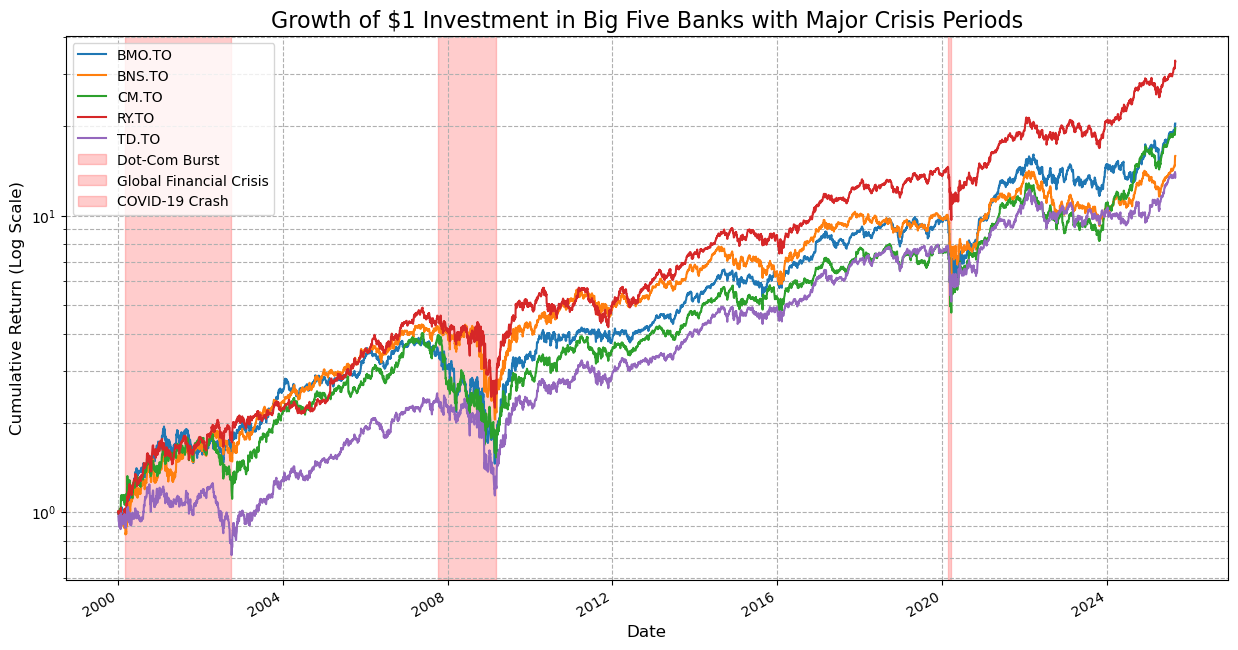

In [16]:
import matplotlib.dates as mdates
cumulative_returns = (1 + daily_returns).cumprod()

# --- Plot Cumulative Returns with Shaded Crisis Periods ---
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the cumulative returns as before
cumulative_returns.plot(ax=ax, legend=False)

# Define crisis periods [start, end]
crisis_periods = {
    'Dot-Com Burst': ['2000-03-01', '2002-10-01'],
    'Global Financial Crisis': ['2007-10-09', '2009-03-09'],
    'COVID-19 Crash': ['2020-02-19', '2020-03-23']
}

# --- THIS IS THE KEY CHANGE ---
# Add shaded regions for each crisis, converting strings to datetime objects
for name, (start_str, end_str) in crisis_periods.items():
    ax.axvspan(
        pd.to_datetime(start_str), # Convert start string to Timestamp
        pd.to_datetime(end_str),   # Convert end string to Timestamp
        color='red',
        alpha=0.2,
        label=name if name not in ax.get_legend_handles_labels()[1] else ""
    )

# Formatting
plt.title('Growth of $1 Investment in Big Five Banks with Major Crisis Periods', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (Log Scale)', fontsize=12)
plt.yscale('log')
plt.grid(True, which="both", ls="--")
# Manually create the legend to ensure it's correct
handles, labels = ax.get_legend_handles_labels()
# This gets the line handles from the plot
line_handles = [h for h in handles if isinstance(h, plt.Line2D)]
# This gets the patch (shaded area) handles
patch_handles = [h for h in handles if isinstance(h, plt.Rectangle)]
# Create a clean legend
ax.legend(handles=line_handles + patch_handles, loc='upper left')

plt.show()

### 3.4.2 - 3.4.4 Stock Price Drawdown

In [18]:
# --- Calculate Maximum Drawdown for Each Crisis ---

# Use your 'adj_close_prices' DataFrame
price_data = bank_data

# Loop through each crisis to calculate and print the drawdown
for name, (start, end) in crisis_periods.items():
    print(f"--- Maximum Drawdown during {name} ---")
    
    # Filter the price data for the crisis period
    crisis_prices = price_data.loc[start:end]
    
    # Calculate the peak price during this period
    peak_price = crisis_prices.cummax()
    
    # Calculate the drawdown percentage from the peak
    drawdown = (crisis_prices - peak_price) / peak_price
    
    # Find the maximum (most negative) drawdown for each bank
    max_drawdown = drawdown.min() * 100 # Convert to percentage
    
    print(max_drawdown.sort_values(ascending=True).to_string())
    print("\n")

--- Maximum Drawdown during Dot-Com Burst ---
TD.TO    -37.584472
CM.TO    -30.009987
BMO.TO   -24.723975
BNS.TO   -22.171908
RY.TO    -18.886403


--- Maximum Drawdown during Global Financial Crisis ---
CM.TO    -61.411698
BMO.TO   -58.254974
TD.TO    -53.991016
BNS.TO   -52.197992
RY.TO    -51.123216


--- Maximum Drawdown during COVID-19 Crash ---
BMO.TO   -44.454318
CM.TO    -38.108751
BNS.TO   -37.397816
TD.TO    -35.140831
RY.TO    -33.843054




--- Generating Drawdown Plots for Each Crisis Period ---


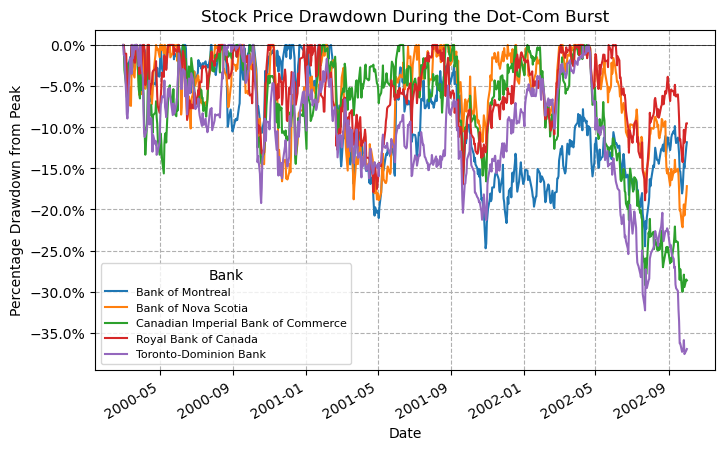

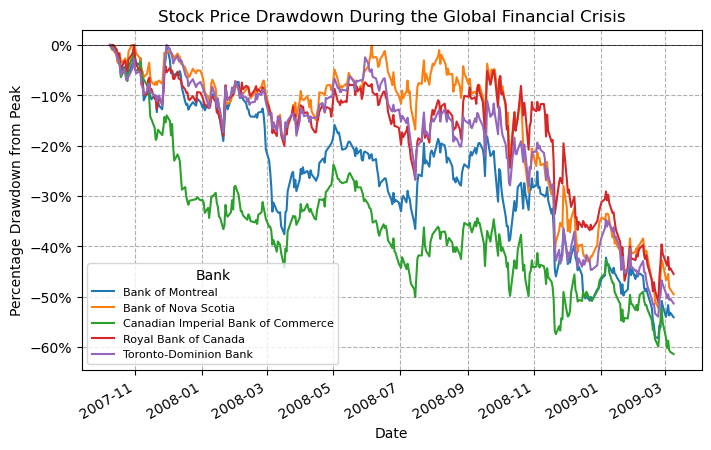

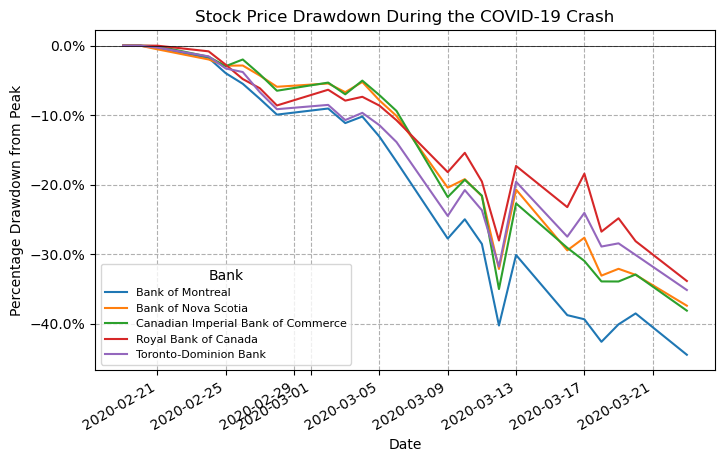

In [40]:

print("--- Generating Drawdown Plots for Each Crisis Period ---")

# Loop through each crisis to create a separate plot
for name, (start, end) in crisis_periods.items():
    
    # --- Data Preparation for this specific crisis ---
    
    # Filter the price data for the crisis period
    crisis_prices = price_data.loc[start:end]
    
    # Calculate the running peak price during this period
    peak_price = crisis_prices.cummax()
    
    # Calculate the drawdown percentage from the peak
    drawdown = (crisis_prices - peak_price) / peak_price
    
    
    # --- Plotting the Drawdown ---
    
    plt.figure(figsize=(8, 5))
    
    tickers = {
    'Royal Bank of Canada': 'RY.TO',
    'Toronto-Dominion Bank': 'TD.TO',
    'Bank of Nova Scotia': 'BNS.TO',
    'Bank of Montreal': 'BMO.TO',
    'Canadian Imperial Bank of Commerce': 'CM.TO'
}

    # Plot the drawdown for each bank
    for ticker in drawdown.columns:
        bank_name = [name for name, t in tickers.items() if t == ticker][0]
        plt.plot(drawdown.index, drawdown[ticker], label=bank_name)
        
    # Formatting the plot for clarity
    plt.title(f'Stock Price Drawdown During the {name}', fontsize=12)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Percentage Drawdown from Peak', fontsize=10)
    
    # Format the y-axis to show percentages
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
    
    plt.legend(title='Bank', fontsize=8)
    plt.grid(True, linestyle='--')
    
    # Add a horizontal line at 0% for reference
    plt.axhline(0, color='black', linewidth=0.5)
    
    plt.show()